In [1]:
import pandas as pd
data = pd.read_excel('../Data/Amazon_Final_Labeled_Data.xlsx')

C:\Users\KHEEM\AppData\Local\Temp\ipykernel_13856\839995338.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


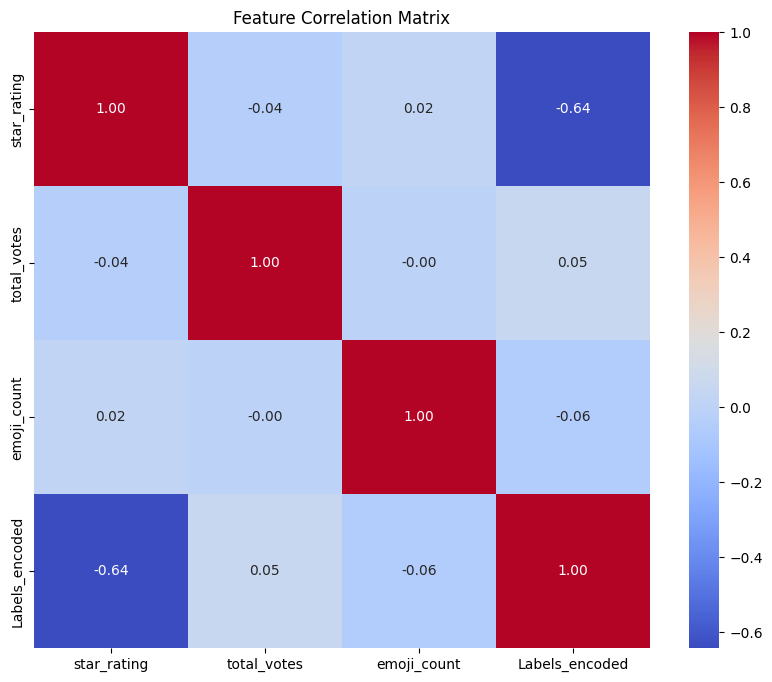

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# For simplicity, let's encode the 'Labels' column to numerical values to facilitate correlation analysis
label_encoding = {'Efficacy': 0, 'Satisfaction': 1, 'Uncertain': 2, 'Dissatisfaction': 3, 'Side Effect': 4}
data['Labels_encoded'] = data['Labels'].map(label_encoding)

# Check if emojis column needs encoding or if it's already in a usable format for correlation analysis
# For now, we'll count the number of emojis in each review as a simple numeric feature
data['emoji_count'] = data['emojis'].apply(lambda x: len(x))

# Calculate the correlation matrix
correlation_matrix = data[['star_rating', 'total_votes', 'emoji_count', 'Labels_encoded']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Feature Correlation Matrix')
plt.show()


C:\Users\KHEEM\AppData\Local\Temp\ipykernel_13856\4094321531.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(emojis), palette='viridis')
c:\Users\KHEEM\Talita\Deciphering-Emojis-A-Data-Analysis-Approach-to-Enhancing-Sentiment-Analysis-in-E-Commerce-Reviews\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


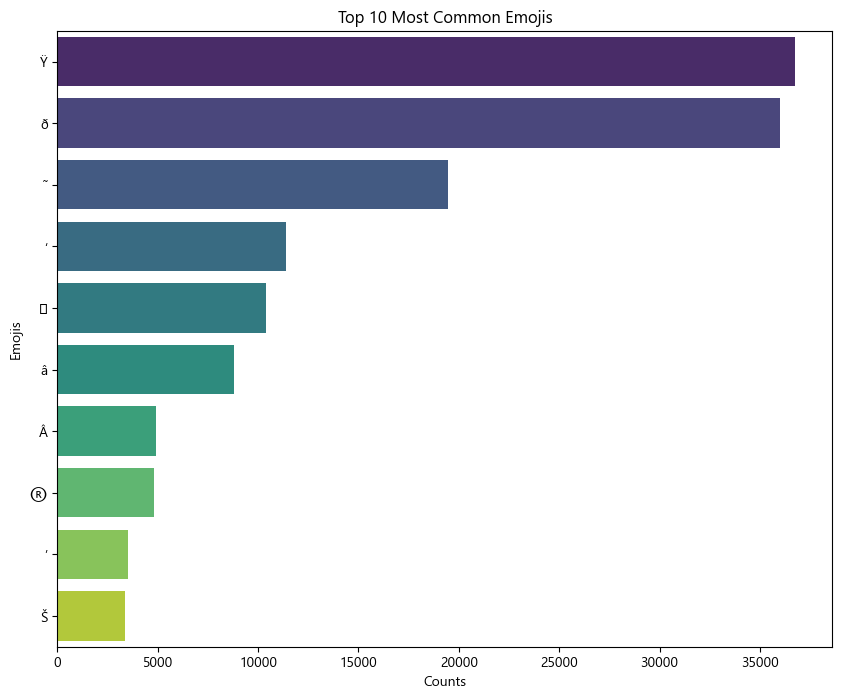

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Since the 'emojis' column might contain multiple instances of the same emoji for each review,
# we'll concatenate all emojis into a single string to count each occurrence
all_emojis = ''.join(data['emojis'])

# Count the occurrences of each emoji
emoji_counts = Counter(all_emojis)

# Get the most common 10 emojis and their counts
most_common_emojis = emoji_counts.most_common(10)
emojis, counts = zip(*most_common_emojis)

from matplotlib import rcParams

# Set the font to 'Segoe UI Emoji'
rcParams['font.family'] = 'Segoe UI Emoji'

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=list(counts), y=list(emojis), palette='viridis')
plt.title('Top 10 Most Common Emojis')
plt.xlabel('Counts')
plt.ylabel('Emojis')
plt.show()